# OSNA Project 1

## Team Members:

### 1. Shreenidhi - A
### 2. Pratik Jadhav - A20543728

# Part 1

### Constructing the graph using only the Nodes interconnected between the Author of the post and the authors of the comments on the post 

**Importing the required libraries**

In [83]:
import praw
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pyvis.network import Network

**Initialize the Reddit object and fetching the data for the subreddit "SocialMedia"**

In [84]:
reddit = praw.Reddit(client_id='hhjRhxhEn6ZNdJJCkUd8TQ',
                     client_secret='WKVxcma6auPs8A5ghaj7CWmh2zDAEg',
                     username='Either-Two-1843',
                     password='Shree_123456',
                     user_agent='Project1_OSNA')

subreddit = reddit.subreddit('socialmedia')

**Initializing the lists which will get populated with Redditor data**

In [85]:
connected_nodes = []
authors = []

**Constructing the function which will add data to the lists**

In [86]:
def populating_data(graph, comment, parent_author):
    if comment.author is not None:
        temp = [parent_author, comment.author]
        if comment.author not in authors:
            authors.append(comment.author)

        connected_nodes.append(temp)

**Here, using the NetworkX graph to construct the graph**

In [87]:
g = nx.Graph()

# Fetching the top 50 reddist posts on "SocialMedia"
posts = subreddit.top(limit=50)

In [88]:
# Iterating over the posts
for post in posts:
    print(f"Author: {post.author}\nTitle: {post.title}\n\n")
    
    # Adding a null safety
    if post.author is not None:
        if post.author not in authors:
            authors.append(post.author)

    # Iterating over the top comments list
    post.comment_limit = 20
    for comment in post.comments.list():
        # Checking whether the comment is not of type Morecomments to avoid errors
        if not type(comment) is praw.models.MoreComments:
            populating_data(g, comment, post.author)

Author: Felkalin
Title: Censorship has gone too far


Author: JohnnyFire
Title: UPDATE: Kelly Blazek, Cleveland Job Bank Founder who rebuked LinkedIn requests with nasty emails, has lost her IABC Communicator of the Year Award


Author: SXSWBot
Title: Burger King uses 50cent to promote his new BKCoffee !


Author: curveballhomerun
Title: Freelance Social Media? Two things I did that my clients loved (you can download them.)


Author: froggie5ohhhhh
Title: 10 Minute Tweaks To Improve your Social/Digital Media TODAY (on any social platform)


Author: SebastianJuhola
Title: How I grew an Instagram account from 4000 followers to 190k in a year


Author: lazymentors
Title: I interviewed 3 Instagram Employees & Studied 2,000+ Posts. Here’s How Instagram algorithm works in 2022!


Author: DedicatedSloth
Title: I was wrong, Tik Tok isn't all dances, lip syncs, and jokes. It's been a major supportive outlet for dealing with mental health and depression.


Author: hinba
Title: Reddit surpasses F

**We can have a look at the connected nodes**

In [89]:
connected_nodes[:10]

[[Redditor(name='Felkalin'), Redditor(name='AutoModerator')],
 [Redditor(name='Felkalin'), Redditor(name='SonofaBranMuffin')],
 [Redditor(name='Felkalin'), Redditor(name='niooosan')],
 [Redditor(name='Felkalin'), Redditor(name='lord__cuthbert')],
 [Redditor(name='Felkalin'), Redditor(name='KosmicKoda')],
 [Redditor(name='Felkalin'), Redditor(name='ResponsibleSteak4994')],
 [Redditor(name='Felkalin'), Redditor(name='A55_Cactu5')],
 [Redditor(name='Felkalin'), Redditor(name='blue_strawberryx')],
 [Redditor(name='Felkalin'), Redditor(name='IAmBabs')],
 [Redditor(name='Felkalin'), Redditor(name='LikeALoneRanger')]]

In [90]:
authors[:10]

[Redditor(name='Felkalin'),
 Redditor(name='AutoModerator'),
 Redditor(name='SonofaBranMuffin'),
 Redditor(name='niooosan'),
 Redditor(name='lord__cuthbert'),
 Redditor(name='KosmicKoda'),
 Redditor(name='ResponsibleSteak4994'),
 Redditor(name='A55_Cactu5'),
 Redditor(name='blue_strawberryx'),
 Redditor(name='IAmBabs')]

**Let's construct a Dataframe consisting of the Author and Commentor as the data columns**

In [91]:
nodedf = pd.DataFrame(nodes, columns=['Author', 'Commentor']).dropna()

In [92]:
nodedf.head()

,Author,Commentor
0,Felkalin,AutoModerator
1,Felkalin,SonofaBranMuffin
2,Felkalin,niooosan
3,Felkalin,lord__cuthbert
4,Felkalin,KosmicKoda


**Generating the graph using dataframe**

In [93]:
graph = nx.from_pandas_edgelist(nodedf, source="Author", target="Commentor")

In [94]:
graph

**Printing the total number of nodes and the edges between them**

In [95]:
print(f"Nodes: {len(graph.nodes())}\nEdges: {len(graph.edges())}")

Nodes: 591
Edges: 626


**Displaying the graph using Pyvis**

In [96]:
g_pyvis = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True, cdn_resources='in_line')

for node in graph_api.nodes():
    g_pyvis.add_node(str(node))

for edge in graph_api.edges():
    g_pyvis.add_edge(str(edge[0]), str(edge[1]))

g_pyvis.show("pyvis_network.html")

pyvis_network.html


**Representing the degree distribution histogram**

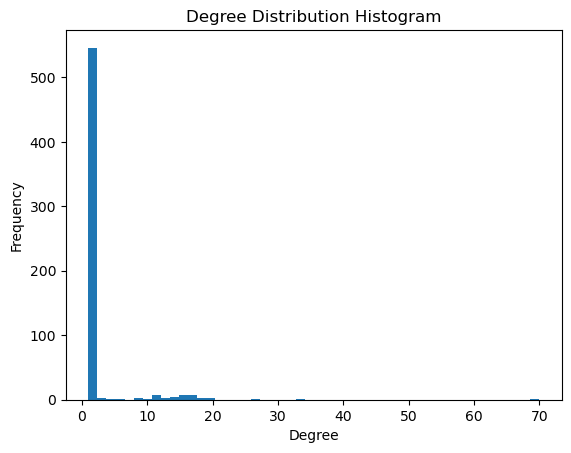

In [108]:
degree = [d for _, d in graph_api.degree()]
degree_histogram = nx.degree_histogram(graph_api)

plt.hist(degree, bins=50)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution Histogram")
plt.show()

**Calculating the Clustering coefficient by calculating the average of the nodes in the graph**

In [98]:
average_clustering = nx.average_clustering(graph_api)
print(f"Clustering Coefficient: {average_clustering}")

Clustering Coefficient: 0.0


**Displaying the closness centrality from the graph**

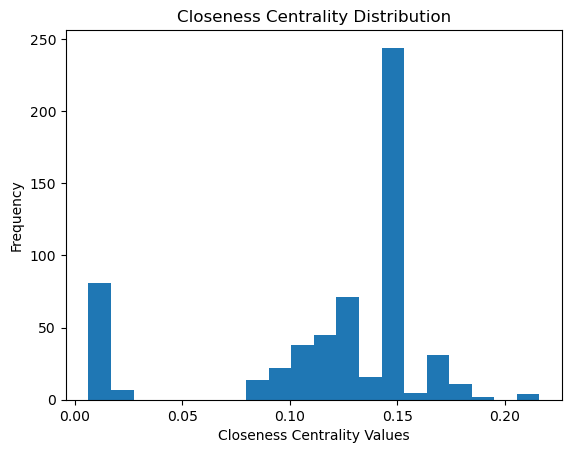

In [99]:
closeness_centrality = nx.closeness_centrality(graph_api)

plt.hist(list(closeness_centrality.values()), bins=20)
plt.xlabel('Closeness Centrality Values')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')
plt.show()

**Let's calculate the average and the median of the Closeness Centrality**

In [110]:
average_closeness_centrality = np.mean(list(closeness_centrality.values()))
median_closeness_centrality = np.median(list(closeness_centrality.values()))
print(f"Average Closeness Centrality: {average_closeness_centrality}")
print(f"Median Closeness Centrality: {median_closeness_centrality}")

Average Closeness Centrality: 0.11868731223795102
Median Closeness Centrality: 0.14357157100128187


**Displaying an Histogram of the Degree centrality of the nodes connected with the edges**

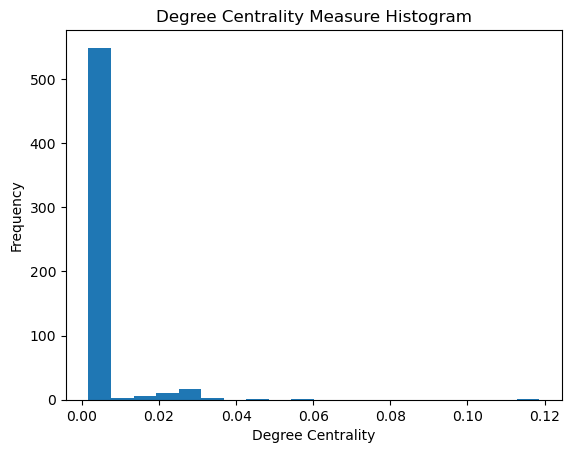

In [101]:
degree_centrality = nx.degree_centrality(graph_api)

plt.hist(list(degree_centrality.values()), bins=20)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Measure Histogram')
plt.show()

**Let's calculate the average and the median of the Degree Centrality**

In [102]:
average_degree_centrality = np.mean(list(degree_centrality.values()))
median_degree_centrality = np.median(list(degree_centrality.values()))

print(f"Average Degree Centrality: {average_degree_centrality}")
print(f"Median Degree Centrality: {median_degree_centrality}")

Average Degree Centrality: 0.0035905818922251855
Median Degree Centrality: 0.001694915254237288


**Displaying an Histogram of the Betweenness centrality of the nodes connected with the edges**

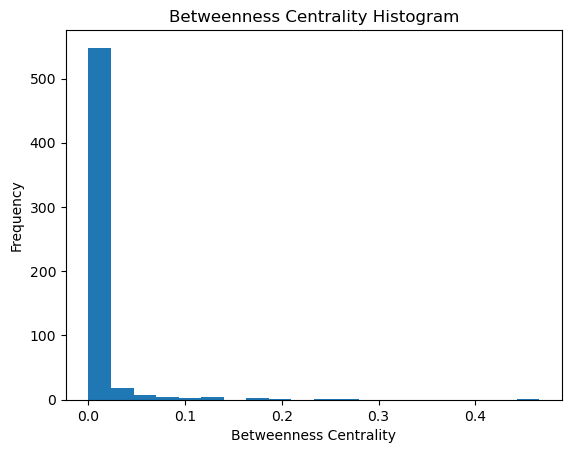

In [103]:
betweenness_centrality = nx.betweenness_centrality(graph_api)

plt.hist(list(betweenness_centrality.values()), bins=20)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Histogram")
plt.show()

**Let's calculate the average and the median of the Betweenness Centrality**

In [111]:
average_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
median_betweenness_centrality = np.median(list(betweenness_centrality.values()))
print(f"Average Betweenness Centrality: {average_betweenness_centrality}")
print(f"Median Betweenness Centrality: {median_betweenness_centrality}")

Average Betweenness Centrality: 0.006613080703078771
Median Betweenness Centrality: 0.0


**Displaying an Histogram of the Katz Centrality among the nodes in the graph**

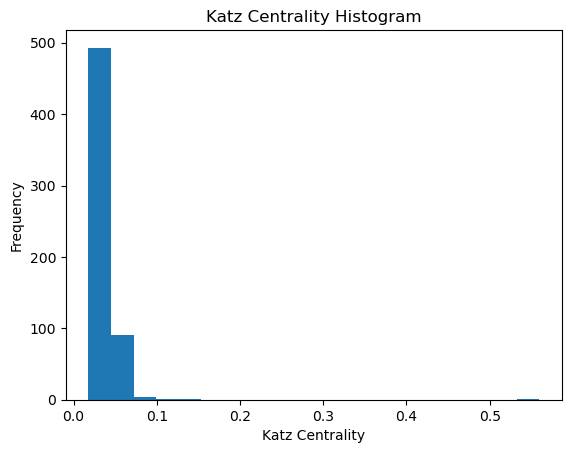

In [105]:
katz_centrality = nx.katz_centrality(graph_api)
katz_values = list(katz_centrality.values())

plt.hist(katz_values, bins=20)
plt.xlabel("Katz Centrality")
plt.ylabel("Frequency")
plt.title("Katz Centrality Histogram")
plt.show()

**Let's calculate the average and the median of the Katz of the graph**

In [112]:
average_katz_values = np.mean(katz_values)
median_katz_values = np.median(katz_values)
print(f"Average of Katz centrality values: {average_katz_values}")
print(f"Median of Katz centrality values: {median_katz_values}")

Average of Katz centrality values: 0.02973527153206457
Median of Katz centrality values: 0.020963591856019457


**Displaying the Page rank representation of the Graph**

In [107]:
pyvis_graph = Network(height="800px", width="100%", notebook=True)

for node, pagerank_value in pagerank.items():
    node_id = str(node)
    pyvis_graph.add_node(node_id, title=f"PageRank: {pagerank_value}")

for edge in graph_api.edges():
    pyvis_graph.add_edge(str(edge[0]), str(edge[1]))


pyvis_graph.show("pagerank1.html")

pagerank1.html


# Part 2

### Constructing the graph using only the Nodes interconnected between the Author of the post and the authors of the comments on the post and also the replies on each comment

### This increasing the connectivity between the nodes and a high ratio of increment in the edges between the nodes

In [20]:
subreddit = reddit.subreddit('socialmedia')

nodes = []
authors = []

def populating_data_with_more_comments(g, comment, parent_author):
    if comment.author is not None:
        if comment.author not in authors:
            authors.append(comment.author)

        temp = [parent_author, comment.author]

        for reply in comment.replies.list():
            if isinstance(reply, praw.models.MoreComments):
                continue

            populating_data_with_more_comments(g, reply, comment.author)
        nodes.append(temp)

g = nx.Graph()

submissions = subreddit.top(limit=50)

for post in submissions:
    print(f"Author: {post.author}\nTitle: {post.title}\n\n")
    if post.author is not None:
        if post.author not in authors:
            authors.append(post.author)

    post.comment_limit = 20
    for comment in post.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue
        populating_data_with_more_comments(g, comment, post.author)



Author: Felkalin
Title: Censorship has gone too far


Author: JohnnyFire
Title: UPDATE: Kelly Blazek, Cleveland Job Bank Founder who rebuked LinkedIn requests with nasty emails, has lost her IABC Communicator of the Year Award


Author: SXSWBot
Title: Burger King uses 50cent to promote his new BKCoffee !


Author: curveballhomerun
Title: Freelance Social Media? Two things I did that my clients loved (you can download them.)


Author: froggie5ohhhhh
Title: 10 Minute Tweaks To Improve your Social/Digital Media TODAY (on any social platform)


Author: SebastianJuhola
Title: How I grew an Instagram account from 4000 followers to 190k in a year


Author: lazymentors
Title: I interviewed 3 Instagram Employees & Studied 2,000+ Posts. Here’s How Instagram algorithm works in 2022!


Author: DedicatedSloth
Title: I was wrong, Tik Tok isn't all dances, lip syncs, and jokes. It's been a major supportive outlet for dealing with mental health and depression.


Author: hinba
Title: Reddit surpasses F

In [21]:
nodes[:10]

authors[:10]

[Redditor(name='Felkalin'),
 Redditor(name='AutoModerator'),
 Redditor(name='SonofaBranMuffin'),
 Redditor(name='blue_strawberryx'),
 Redditor(name='zenware'),
 Redditor(name='dragonsapphic'),
 Redditor(name='chjesper'),
 Redditor(name='Moist_Confusion'),
 Redditor(name='niooosan'),
 Redditor(name='IAmBabs')]

In [22]:
nodedf = pd.DataFrame(nodes, columns=['Author', 'Commentor']).dropna()

nodedf.head()

,Author,Commentor
0,Felkalin,AutoModerator
1,blue_strawberryx,zenware
2,zenware,blue_strawberryx
3,zenware,dragonsapphic
4,zenware,zenware


In [23]:
graph_api = nx.from_pandas_edgelist(nodedf, source="Author", target="Commentor")

graph_api

print(f"Nodes: {len(graph_api.nodes())}\nEdges: {len(graph_api.edges())}")

Nodes: 598
Edges: 836


In [24]:
g_pyvis = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)

for node in graph_api.nodes():
    g_pyvis.add_node(str(node))

for edge in graph_api.edges():
    g_pyvis.add_edge(str(edge[0]), str(edge[1]))

g_pyvis.show("pyvis_network.html")

pyvis_network.html


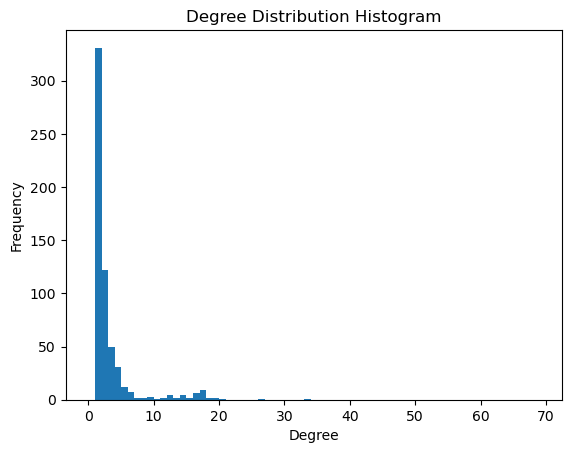

In [25]:
degree_sequence = [d for n, d in graph_api.degree()]
degree_histogram = nx.degree_histogram(graph_api)

plt.hist(degree_sequence, bins=range(max(degree_sequence)))
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution Histogram")
plt.show()


In [26]:
average_clustering = nx.average_clustering(graph_api)
print(f"Clustering Coefficient: {average_clustering}")

Clustering Coefficient: 0.31406727702412124


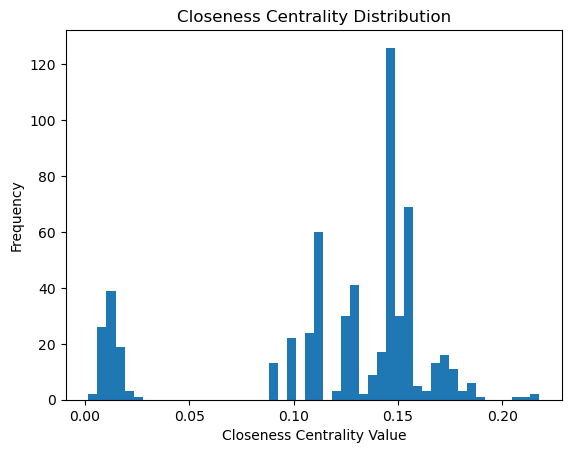

In [27]:
closeness_centrality = nx.closeness_centrality(graph_api)

plt.hist(list(closeness_centrality.values()), bins=20)
plt.xlabel('Closeness Centrality Value')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Distribution')
plt.show()


In [28]:
average = sum(closeness_centrality.values())/len(closeness_centrality)
median = sorted(closeness_centrality.values())[len(closeness_centrality)//2]
print(f"Average Closeness Centrality: {average}")
print(f"Median Closeness Centrality: {median}")

Average Closeness Centrality: 0.11941175748498303
Median Closeness Centrality: 0.1437622167599265


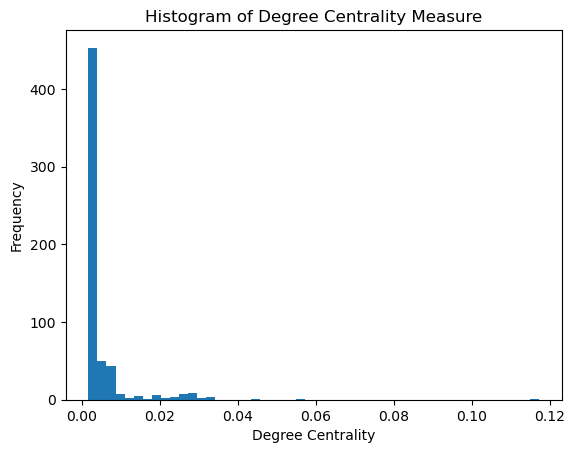

In [29]:
degree_centrality = nx.degree_centrality(graph_api)

plt.hist(list(degree_centrality.values()), bins=20)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Measure Histogram')
plt.show()

In [30]:
mean_degree_centrality = np.mean(list(degree_centrality.values()))
median_degree_centrality = np.median(list(degree_centrality.values()))

print(f"Average Degree Centrality: {mean_degree_centrality}")
print(f"Median Degree Centrality: {median_degree_centrality}")



Average Degree Centrality: 0.004683394676840166
Median Degree Centrality: 0.0016750418760469012


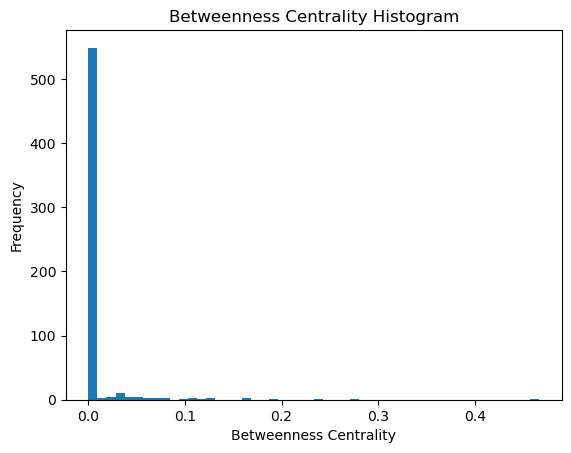

In [31]:
betweenness_centrality = nx.betweenness_centrality(graph_api)

plt.hist(list(betweenness_centrality.values()), bins=50)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Histogram")
plt.show()



In [32]:
average = sum(betweenness_centrality.values())/len(betweenness_centrality)
median = sorted(betweenness_centrality.values())[len(betweenness_centrality)//2]
print(f"Average Betweenness Centrality: {average}")
print(f"Median Betweenness Centrality: {median}")



Average Betweenness Centrality: 0.006445927797652865
Median Betweenness Centrality: 0.0


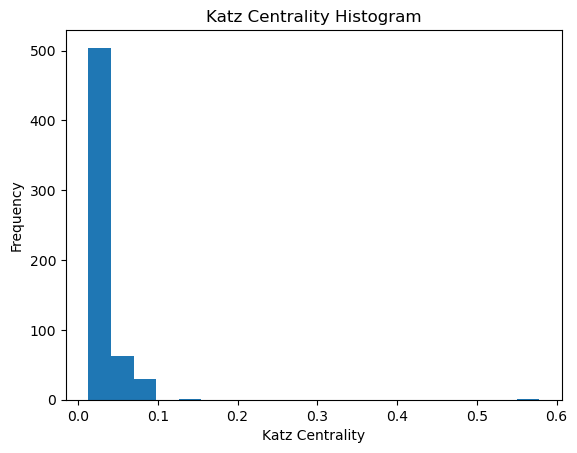

In [33]:
katz_centrality = nx.katz_centrality(graph_api)
katz_values = list(katz_centrality.values())

plt.hist(katz_values, bins=20)
plt.xlabel("Katz Centrality")
plt.ylabel("Frequency")
plt.title("Katz Centrality Histogram")
plt.show()



In [34]:
average = np.mean(katz_values)
median = np.median(katz_values)
print(f"Average of Katz centrality values: {average}")
print(f"Median of Katz centrality values: {median}")



Average of Katz centrality values: 0.027935640188774168
Median of Katz centrality values: 0.01841834023846006


In [47]:
pyvis_graph = Network(height="800px", width="100%", notebook=True)

for node, pagerank_value in pagerank.items():
    node_id = str(node)
    pyvis_graph.add_node(node_id, title=f"PageRank: {pagerank_value}")

for edge in graph_api.edges():
    pyvis_graph.add_edge(str(edge[0]), str(edge[1]))

pyvis_graph.barnes_hut()

pyvis_graph.show("pagerank2.html")

pagerank2.html
